# Tutorial 1: Getting Started with SQuADDS

In this tutorial, we will walk you through some basic usage of SQuADDS. By the end of this tutorial, you will be able to:

- Have an HuggingFace account

- Access the SQuADDS Database

- Use the SQuADDS API to query for closest and "best-guess" interpolated device designs for your chosen Hamiltonian parameters

- Simulate the "best-guess" design using an EM solver tool

In [1]:
%load_ext autoreload
%autoreload 2

Since the SQuADDS Database is hosted on [HuggingFace](https://huggingface.co/), we will need to create an account and get an API key to access the database.

## HuggingFace 🤗 

HuggingFace is a company that provides a large number of NLP models and datasets. They also provide a platform to host your own models and datasets.

### Creating an  Account

Follow the instructions here - [HuggingFace: Sign Up](https://huggingface.co/join) - to create an account.

Once you have created an account, you can get your API key from the [settings page](https://huggingface.co/settings/token).

Please update the `HUGGINGFACE_API_KEY` variable in the `.env` file with your API key **OR** execute the following code to set the environment variable.

In [ ]:
from squadds.core.utils import set_huggingface_api_key

set_huggingface_api_key()

### Login

To login to your HuggingFace account, run the following command in your terminal:

```bash
huggingface-cli login
```



You will be prompted to enter your username and password. Once you have logged in, you can check your login status by running the following command:

```bash
huggingface-cli whoami
```

### Accessing the SQuADDS Database using the HuggingFace API

The SQuADDS Database is hosted on HuggingFace. You can access the database using the `datasets` library from HuggingFace.

In [2]:
from datasets import get_dataset_config_names
from datasets import load_dataset

configs = get_dataset_config_names("SQuADDS/SQuADDS_DB")

You can navigate the database using HuggingFace API. For example, you can access the qubit database using the following code:

In [3]:
qubit_data = load_dataset("SQuADDS/SQuADDS_DB", configs[0])

Generating train split: 0 examples [00:00, ? examples/s]

In [4]:
qubit_data

DatasetDict({
    train: Dataset({
        features: ['sim_options', 'sim_results', 'notes', 'design', 'contributor'],
        num_rows: 1934
    })
})

Each configuration in the dataset is uniquely identified by their `config`. For the SQuADDS Database, the `config` string is created in the following format:

```python
config = f"{component}_{component_name}_{data_type}"
```

where `component` is the name of the component, `component_name` is the name of the component (in Qiskit Metal), and `data_type` is the type of simulation data that has been contributed.

Lets check what the `config` string looks like for our database:

In [5]:
components = []
component_names = []
data_types = []

for config in configs:
    try:
        components.append(config.split("-")[0])
        component_names.append(config.split("-")[1])
        data_types.append(config.split("-")[2])
    except:
        pass
    
print(components)
print(component_names)
print(data_types)
    

['qubit', 'cavity_claw', 'coupler', 'coupler', 'measured_device_database']
['TransmonCross', 'RouteMeander', 'NCap', 'CapNInterdigitalTee']
['cap_matrix', 'eigenmode', 'cap_matrix', 'cap_matrix']


The reason we added the `try except` block is because we have more datasets as well in the database that don't conform the simulation data format

## Using the SQuADDS API to access and anlyze the database

While it is possible to directly access the SQuADDS Database using the `datasets` library, we have created a simple API to make it easier to query the database.

The main object we use to access the database is the `SQuADDS_DB` class. 

In [6]:
from squadds import SQuADDS_DB

db = SQuADDS_DB()

You can get a summary of the datasets by running.

In [7]:
db.view_datasets()

+-------------+---------------------+------------------+--------------------------------------------------------------------------------------------+
| Component   | Component Name      | Data Available   | Component Image                                                                            |
+=============+=====================+==================+============================================================================================+
| qubit       | TransmonCross       | cap_matrix       | https://github.com/LFL-Lab/SQuADDS/tree/master/docs/_static/images/TransmonCross.png       |
+-------------+---------------------+------------------+--------------------------------------------------------------------------------------------+
| qubit       | TransmonCross       | cap_matrix       | https://github.com/LFL-Lab/SQuADDS/tree/master/docs/_static/images/TransmonCross.png       |
+-------------+---------------------+------------------+--------------------------------------------

To check for the `config` names

In [8]:
db.get_configs()

['qubit-TransmonCross-cap_matrix',
 'cavity_claw-RouteMeander-eigenmode',
 'coupler-NCap-cap_matrix',
 'coupler-CapNInterdigitalTee-cap_matrix']


**NOTE: `'coupler-NCap-cap_matrix'` and `''coupler-CapNInterdigitalTee-cap_matrix'` are the same datasets. We will support them both since future releases will deprecate the term `NCap` and replace it with `CapNInterdigitalTee`.**

If you are interested to learn more about each configuration, you can do so by using the `get_dataset_info` method.


In [9]:
db.get_dataset_info(component="qubit", component_name="TransmonCross", data_type="cap_matrix")

Generating train split: 0 examples [00:00, ? examples/s]

Dataset Features:
{'contributor': {'PI': Value(dtype='string', id=None),
                 'date_created': Value(dtype='string', id=None),
                 'group': Value(dtype='string', id=None),
                 'institution': Value(dtype='string', id=None),
                 'uploader': Value(dtype='string', id=None)},
 'design': {'design_options': {...},
            'design_tool': Value(dtype='string', id=None)},
 'notes': {},
 'sim_options': {'renderer_options': {...},
                 'setup': {...},
                 'simulator': Value(dtype='string', id=None)},
 'sim_results': {'claw_to_claw': Value(dtype='float64', id=None),
                 'claw_to_ground': Value(dtype='float64', id=None),
                 'cross_to_claw': Value(dtype='float64', id=None),
                 'cross_to_cross': Value(dtype='float64', id=None),
                 'cross_to_ground': Value(dtype='float64', id=None),
                 'ground_to_ground': Value(dtype='float64', id=None),
                 'u

In [10]:
db.get_dataset_info(component="cavity_claw", component_name="RouteMeander", data_type="eigenmode")

Generating train split: 0 examples [00:00, ? examples/s]

Dataset Features:
{'contributor': {'PI': Value(dtype='string', id=None),
                 'date_created': Value(dtype='string', id=None),
                 'group': Value(dtype='string', id=None),
                 'institution': Value(dtype='string', id=None),
                 'misc': Value(dtype='string', id=None),
                 'uploader': Value(dtype='string', id=None)},
 'design': {'coupler_type': Value(dtype='string', id=None),
            'design_options': {...},
            'design_tool': Value(dtype='string', id=None),
            'resonator_type': Value(dtype='string', id=None)},
 'notes': {},
 'sim_options': {'renderer_options': {...},
                 'setup': {...},
                 'simulator': Value(dtype='string', id=None)},
 'sim_results': {'cavity_frequency': Value(dtype='float64', id=None),
                 'kappa': Value(dtype='float64', id=None),
                 'units': Value(dtype='string', id=None)}}

Dataset Description:


Dataset Citation:


Dataset Homepage

You can get the entire dataset as a Pandas DataFrame by using the `get_dataset` method.

In [11]:
db.see_dataset(component="qubit", component_name="TransmonCross", data_type="cap_matrix")

renderer_options  \
0     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
2     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
3     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
4     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
...                                                 ...   
1929  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1930  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1931  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1932  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1933  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                                  setup   simulator  \
0     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
2     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
3     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
4     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
...                                                 ...         ...   
1929  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1930  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1931  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1932  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1933  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   

      claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
0         94.97421        90.86585        3.73363       158.40783   
1         82.44280        79.19378        2.93820       188.15089   
2         83.76412        80.18130        3.16131       104.35340   
3        103.37057        97.22405        5.77590       174.13928   
4         68.92854        65.68607        2.87375       120.03923   
...            ...             ...            ...             ...   
1929     106.43025       101.53197        4.45645       174.46380   
1930     121.10943       112.62570        7.95178       187.43537   
1931     144.56289       136.36810        7.65968       172.14561   
1932      68.76413        65.78116        2.48795        56.75230   
1933      58.45749        55.50796        2.54396        62.01000   

      cross_to_ground  ground_to_ground units  \
0           158.40783         311.25590    fF   
1           188.15089         333.52997    fF   
2           104.35340         237.02548    fF   
3           174.13928         335.31609    fF   
4           120.03923         240.34085    fF   
...               ...               ...   ...   
1929        174.46380         340.62919    fF   
1930        187.43537         367.34003    fF   
1931        172.14561         372.39970    fF   
1932         56.75230         166.57383    fF   
1933         62.01000         162.42140    fF   

                                         design_options   design_tool  \
0     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
2     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
3     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
4     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
...                                                 ...           ...   
1929  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1930  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1931  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1932  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1933  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   

                          PI       date_created group institution   uploader  
0     Eli Levenson-Falk, PhD  2023-09-20-142547   LFL         USC  Andre Kuo  
1     Eli Levenson-Falk,

You can also learn more about the measured device that generated this dataset:

In [12]:
db.view_reference_device_of(component="qubit", component_name="TransmonCross", data_type="cap_matrix")

Generating train split: 0 examples [00:00, ? examples/s]

+--------------------+------------------------------------------------------------------------------------+
| Design Code        | https://github.com/LFL-Lab/design_schema_WM1                                       |
+--------------------+------------------------------------------------------------------------------------+
| Paper Link         | https://arxiv.org/pdf/2312.13483                                                   |
+--------------------+------------------------------------------------------------------------------------+
| Image              | https://github.com/LFL-Lab/design_schema_WM1/blob/main/assets/WM1_qiskit_metal.png |
+--------------------+------------------------------------------------------------------------------------+
| Foundry            | SQUILL                                                                             |
+--------------------+------------------------------------------------------------------------------------+
| Fabrication Recipe | Confi

You can also learn more about the other measured devices that are available in SQuADDS

In [13]:
db.get_measured_devices()

Name                                        Design Code  \
0           WM1       https://github.com/LFL-Lab/design_schema_WM1   
1  “dissipator”  https://github.com/LFL-Lab/design_schema_dissi...   
2        MUNNIN    https://github.com/LFL-Lab/design_schema_MUNNIN   

                                          Paper Link  \
0                   https://arxiv.org/pdf/2312.13483   
1  https://journals.aps.org/prxquantum/abstract/1...   
2  https://journals.aps.org/prl/abstract/10.1103/...   

                                               Image      Foundry  
0  https://github.com/LFL-Lab/design_schema_WM1/b...       SQUILL  
1  https://github.com/LFL-Lab/design_schema_dissi...  USC Nanofab  
2  https://github.com/LFL-Lab/design_schema_MUNNI...       SQUILL

If you want to learn about the who contributed the simulation data, you can use the following methods:

In [14]:
db.view_contributors_of("qubit", "TransmonCross", "cap_matrix")

			Measured Device Contributor(s):
+-----------------------+-------------------------------------------------------+
| Foundry               | N/A                                                   |
+-----------------------+-------------------------------------------------------+
| PI                    | Eli Levenson-Falk, PhD                                |
+-----------------------+-------------------------------------------------------+
| Group                 | LFL                                                   |
+-----------------------+-------------------------------------------------------+
| Institution           | USC                                                   |
+-----------------------+-------------------------------------------------------+
| Measured By           | Sadman Ahmed Shanto, Malinda Hecht, Evangelos Vlachos |
+-----------------------+-------------------------------------------------------+
| Reference Device Name | WM1                                  

To see the list of all the contributors, you can use the following method:

In [15]:
db.view_all_contributors()

+--------------------+------------------------------------+---------------------------------------+
| Name               | Institution                        | Contribution                          |
+====================+====================================+=======================================+
| Clark Miyamoto     | New York University                | Code contributor 💻                   |
+--------------------+------------------------------------+---------------------------------------+
| Madison Howard     | California Institute of Technology | Bug Hunter 🐛                         |
+--------------------+------------------------------------+---------------------------------------+
| Malida Hecht       | University of Southern California  | Data contributor 📀                   |
+--------------------+------------------------------------+---------------------------------------+
| Evangelos Vlachos  | University of Southern California  | Code contributor 💻 and Bug Hunter 🐛 |
+----

As the SQuADDS_DB dataset updates, so will all the information we have queried automatically. 

## Making Systems out of Circuit QED Elements

One of the main use cases of the SQuADDS project is to get the design space parameters for systems of our interest using our desired Hamiltonian parameters.

Using the SQuADDS API, we can "build" a system by choosing the circuit QED components we want to use.

The following subsections walks you through some examples.

### Querying for the a target qubit design

Let's say you know the Hamiltonian parameters of a qubit you want to use. You can use the SQuADDS API to query for the closest design to your target qubit.

We first need to select our sytem of interest.

In [16]:
db.select_system("qubit")

Now, we need to specify to SQuADDS what type of `qubit` our system is. We can do this by using the `select_qubit` method.

In [17]:
db.select_qubit("TransmonCross")

We now create the system dataframe so that we can query for the design parameters we are interested in.

In [18]:
df = db.create_system_df()
df

renderer_options  \
0     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
2     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
3     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
4     {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
...                                                 ...   
1929  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1930  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1931  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1932  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1933  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                                  setup   simulator  \
0     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
2     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
3     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
4     {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
...                                                 ...         ...   
1929  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1930  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1931  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1932  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1933  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   

      claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
0         94.97421        90.86585        3.73363       158.40783   
1         82.44280        79.19378        2.93820       188.15089   
2         83.76412        80.18130        3.16131       104.35340   
3        103.37057        97.22405        5.77590       174.13928   
4         68.92854        65.68607        2.87375       120.03923   
...            ...             ...            ...             ...   
1929     106.43025       101.53197        4.45645       174.46380   
1930     121.10943       112.62570        7.95178       187.43537   
1931     144.56289       136.36810        7.65968       172.14561   
1932      68.76413        65.78116        2.48795        56.75230   
1933      58.45749        55.50796        2.54396        62.01000   

      cross_to_ground  ground_to_ground units  \
0           158.40783         311.25590    fF   
1           188.15089         333.52997    fF   
2           104.35340         237.02548    fF   
3           174.13928         335.31609    fF   
4           120.03923         240.34085    fF   
...               ...               ...   ...   
1929        174.46380         340.62919    fF   
1930        187.43537         367.34003    fF   
1931        172.14561         372.39970    fF   
1932         56.75230         166.57383    fF   
1933         62.01000         162.42140    fF   

                                         design_options   design_tool  \
0     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
2     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
3     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
4     {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
...                                                 ...           ...   
1929  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1930  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1931  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1932  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   
1933  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...  qiskit-metal   

                          PI       date_created group institution   uploader  
0     Eli Levenson-Falk, PhD  2023-09-20-142547   LFL         USC  Andre Kuo  
1     Eli Levenson-Falk,

Now that we have created our system dataframe, we can query for the closest design to our target qubit parameters. To do this we need to call the `Analyzer` object.

In [19]:
from squadds import Analyzer

We instatantaite the `Analyzer` object by passing in the `SQuADDS_DB` instance we created earlier.

In [20]:
analyzer = Analyzer(db)

We can now check for what type of Hamiltonian parameters are available for our chosen system

In [21]:
analyzer.target_param_keys()

['qubit_frequency_GHz', 'anharmonicity_MHz']

Now, Let's select a geometry which results in the closest qubit characteristics

Call `Analyzer.find_closest`

**Documentation:**

```
Finds the rows in the DataFrame with the closest matching characteristics
to the given target parameters using a specified metric.

Args:
    target_params (dict): A dictionary containing the target values for columns in `self.df`.
                          Keys are column names and values are the target values.
    num_top (int): The number of closest matching rows to return.
    metric (str, optional): The distance metric to use for finding the closest matches.
                            Available options are specified in `self.__supported_metrics__`.
                            Defaults to 'Euclidean'.
    display (bool, optional): Whether to display warnings and logs. Defaults to True.

Returns:
    pd.DataFrame: A DataFrame containing the rows with the closest matching characteristics,
                  sorted by the distance metric.

Raises:
    ValueError: If the specified metric is not supported or `num_top` exceeds the DataFrame size.
```

You are given the choice of the following metrics.

In [22]:
analyzer.__supported_metrics__

['Euclidean', 'Manhattan', 'Chebyshev', 'Weighted Euclidean', 'Custom']

Define your Hamiltonian parameters that you want to use for your qubit 

In [23]:
target_params={"qubit_frequency_GHz": 4, "anharmonicity_MHz": -200}

In [24]:
results = analyzer.find_closest(target_params=target_params,
                                       num_top=3,
                                       metric="Euclidean",
                                       display=True)
results

renderer_options  \
643   {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1862  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1714  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                                  setup   simulator  \
643   {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1862  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   
1714  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   

      claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
643      106.91739       101.13161        5.25204       102.49025   
1862      80.01554        76.72741        2.89095       104.64079   
1714      76.27207        73.26136        2.62986       104.89818   

      cross_to_ground  ground_to_ground units  ...   design_tool  \
643         102.49025         255.94708    fF  ...  qiskit-metal   
1862        104.64079         233.88902    fF  ...  qiskit-metal   
1714        104.89818         230.69451    fF  ...  qiskit-metal   

                          PI       date_created group institution   uploader  \
643   Eli Levenson-Falk, PhD  2023-09-20-142547   LFL         USC  Andre Kuo   
1862  Eli Levenson-Falk, PhD  2023-09-20-142547   LFL         USC  Andre Kuo   
1714  Eli Levenson-Falk, PhD  2023-09-20-142547   LFL         USC  Andre Kuo   

            EC         EJ  qubit_frequency_GHz  anharmonicity_MHz  
643   0.179783  12.278081             4.013772        -201.551532  
1862  0.180135  12.278081             4.017505        -201.973598  
1714  0.180141  12.278081             4.017570        -201.981031  

[3 rows x 21 columns]

Thats it! You have now found some designs for your qubit that are closest to your target Hamiltonian parameters.

#### Using Custom Metrics

To use a custom metric first define the function. For example, lets say we want the manhattan metric

In [25]:
def manhattan_distance(target, simulated):
    return sum(abs(target[key] - simulated.get(key, 0)) for key in target)

In [26]:
analyzer.custom_metric_func = manhattan_distance

In [27]:
analyzer.find_closest(target_params=target_params,
                                            num_top=1,
                                            metric="Custom",
                                            display=True)

Either `skip_df_gen` flag is set to True or all target params have been precomputed at an earlier step. Using `df` from memory.
Please set this to False if `target_parameters` have changed.


renderer_options  \
643  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                                 setup   simulator  \
643  {'auto_increase_solution_order': True, 'enable...  Ansys HFSS   

     claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
643     106.91739       101.13161        5.25204       102.49025   

     cross_to_ground  ground_to_ground units  ...   design_tool  \
643        102.49025         255.94708    fF  ...  qiskit-metal   

                         PI       date_created group institution   uploader  \
643  Eli Levenson-Falk, PhD  2023-09-20-142547   LFL         USC  Andre Kuo   

           EC         EJ  qubit_frequency_GHz  anharmonicity_MHz  
643  0.179783  12.278081             4.013772        -201.551532  

[1 rows x 21 columns]

In [28]:
best_options = results.iloc[0]["design_options"]
best_options

{'aedt_hfss_capacitance': 0,
 'aedt_hfss_inductance': 9.686e-09,
 'aedt_q3d_capacitance': 0,
 'aedt_q3d_inductance': 1e-08,
 'chip': 'main',
 'connection_pads': {'readout': {'claw_cpw_length': '40um',
   'claw_cpw_width': '10um',
   'claw_gap': '5.1um',
   'claw_length': '190um',
   'claw_width': '15um',
   'connector_location': '90',
   'connector_type': '0',
   'ground_spacing': '10um'}},
 'cross_gap': '30um',
 'cross_length': '210um',
 'cross_width': '30um',
 'gds_cell_name': 'my_other_junction',
 'hfss_capacitance': 0,
 'hfss_inductance': 9.686e-09,
 'hfss_mesh_kw_jj': 7e-06,
 'hfss_resistance': 0,
 'layer': '1',
 'orientation': '-90',
 'pos_x': '-1500um',
 'pos_y': '1200um',
 'q3d_capacitance': 0,
 'q3d_inductance': '10nH',
 'q3d_mesh_kw_jj': 7e-06,
 'q3d_resistance': 0}

You can pass in the `design_options` from the closest design to the `options` argument of your selected qubit and render it in qiskit metal.

In [29]:
# Qiskit Metal imports
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
from qiskit_metal.designs.design_multiplanar import MultiPlanar

from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.core import QRoute, QRoutePoint

In [30]:
design = MultiPlanar(metadata={},
                     overwrite_enabled=True)
gui = MetalGUI(design)

01:14PM 50s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Populating font family aliases took 371 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 



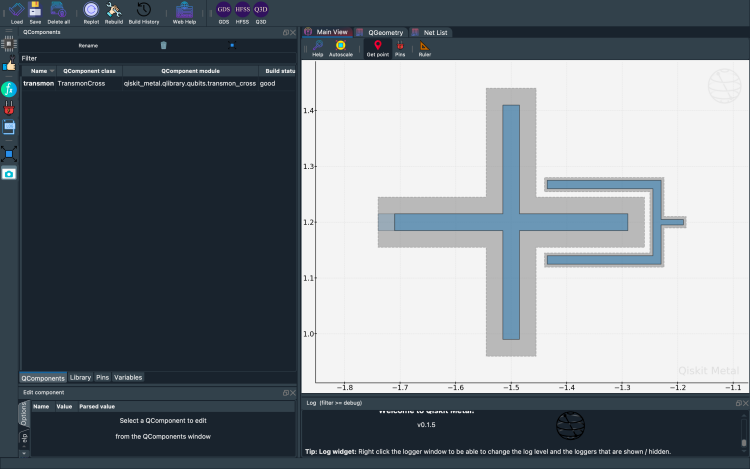

In [31]:
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross

TransmonCross(design, "transmon", options=best_options)

gui.rebuild()
gui.zoom_on_components(['transmon'])
gui.screenshot("qubit_only.png")

### Querying for a target cavity design

The same workflow can be used to query for a target cavity design.

While it is not necessary, it may be a good idea to `unselect_all()` before creating a new system.

In [32]:
db.unselect_all()

Proceed with selecting the system of interest

In [33]:
db.select_system("cavity_claw")

In [34]:
db.select_cavity_claw("RouteMeander")

In [35]:
db.select_resonator_type("quarter")

It's always a good idea to check that the system you have selected is correct.

In [36]:
db.show_selections()

Selected component:  cavity_claw
Selected component name:  RouteMeander
Selected data type:  eigenmode
Selected system:  cavity_claw
Selected coupler:  CLT
Selected resonator type:  quarter


Great! lets create the system dataframe and analyze it.

In [37]:
df = db.create_system_df()

In [38]:
analyzer = Analyzer(db)

In [39]:
analyzer.target_param_keys()

['resonator_type', 'cavity_frequency_GHz', 'kappa_kHz']

Select the Hamiltonian parameters you want to use for your cavity and search for the closest designs.

In [40]:
target_params = {"cavity_frequency_GHz": 6.9,
                "kappa_kHz": 120,
                "resonator_type":"quarter"}

In [41]:
results = analyzer.find_closest(target_params=target_params,
                                       num_top=5,
                                       metric="Euclidean",
                                       display=True)
results

renderer_options                                              setup  \
1191             None  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
1192             None  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
1189             None  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
190              None  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
1190             None  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   

       simulator  cavity_frequency_GHz   kappa_kHz coupler_type  \
1191  Ansys HFSS              6.948003  122.218952          CLT   
1192  Ansys HFSS              6.915761  125.765213          CLT   
1189  Ansys HFSS              7.013518  127.327511          CLT   
190   Ansys HFSS              6.371017  121.824395          CLT   
1190  Ansys HFSS              6.980933  129.751169          CLT   

                                         design_options   design_tool  \
1191  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
1192  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
1189  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
190   {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
1190  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   

     resonator_type                      PI       date_created group  \
1191        quarter  Eli Levenson-Falk, PhD  2024-07-24-230000   LFL   
1192        quarter  Eli Levenson-Falk, PhD  2024-07-24-230000   LFL   
1189        quarter  Eli Levenson-Falk, PhD  2024-07-24-230000   LFL   
190         quarter  Eli Levenson-Falk, PhD  2023-11-30-214122   LFL   
1190        quarter  Eli Levenson-Falk, PhD  2024-07-24-230000   LFL   

     institution  misc     uploader  
1191         USC  None  Ethan Zheng  
1192         USC  None  Ethan Zheng  
1189         USC  None  Ethan Zheng  
190          USC  None    Andre Kuo  
1190         USC  None  Ethan Zheng

Lets say we want to use the "Weighted Euclidean" metric to find the closest design to our target cavity parameters.

#### Weighted Euclidean Metric

You can do a weighted Euclidean metric instead.

$$
F(\{P_i\},\{p_i\}) = \sum_i w_i\frac{(P_i - p_i)^2}{P_i^2}
$$

Here \( w_i \) are weights which default to 1 if not user-defined.

Note: The default metric for `find_closest` is `Euclidean` when not user-defined.


In [42]:
# Set up the weights
analyzer.metric_weights = {"cavity_frequency_GHz": 2, "kappa_kHz": 1}

In [43]:
results = analyzer.find_closest(target_params=target_params,
                                       num_top=3,
                                       metric="Weighted Euclidean",
                                       display=True)
results

renderer_options                                              setup  \
1191             None  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
1192             None  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   
1189             None  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   

       simulator  cavity_frequency_GHz   kappa_kHz coupler_type  \
1191  Ansys HFSS              6.948003  122.218952          CLT   
1192  Ansys HFSS              6.915761  125.765213          CLT   
1189  Ansys HFSS              7.013518  127.327511          CLT   

                                         design_options   design_tool  \
1191  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
1192  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   
1189  {'claw_opts': {'connection_pads': {'readout': ...  qiskit-metal   

     resonator_type                      PI       date_created group  \
1191        quarter  Eli Levenson-Falk, PhD  2024-07-24-230000   LFL   
1192        quarter  Eli Levenson-Falk, PhD  2024-07-24-230000   LFL   
1189        quarter  Eli Levenson-Falk, PhD  2024-07-24-230000   LFL   

     institution  misc     uploader  
1191         USC  None  Ethan Zheng  
1192         USC  None  Ethan Zheng  
1189         USC  None  Ethan Zheng

### Querying for a target qubit-cavity design

Again, we follow the same procedure as before.

In [44]:
db.select_system(["qubit","cavity_claw"])

In [45]:
db.select_qubit("TransmonCross")
db.select_cavity_claw("RouteMeander")
db.select_resonator_type("quarter")

In [46]:
db.show_selections()

Selected qubit:  TransmonCross
Selected cavity:  RouteMeander
Selected coupler to feedline:  CLT
Selected resonator type:  quarter
Selected system:  ['qubit', 'cavity_claw']


In [47]:
merged_df = db.create_system_df()

In [48]:
merged_df

index_qc                             renderer_options_qubit  \
0             0  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
1             0  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
2             0  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
3             0  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
4             0  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
...         ...                                                ...   
22191      1642  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
22192      1642  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
22193      1642  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
22194      1642  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
22195      1642  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                             setup_qubit simulator_qubit  \
0      {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
1      {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
2      {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
3      {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
4      {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
...                                                  ...             ...   
22191  {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
22192  {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
22193  {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
22194  {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
22195  {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   

       claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
0          94.97421        90.86585        3.73363       158.40783   
1          94.97421        90.86585        3.73363       158.40783   
2          94.97421        90.86585        3.73363       158.40783   
3          94.97421        90.86585        3.73363       158.40783   
4          94.97421        90.86585        3.73363       158.40783   
...             ...             ...            ...             ...   
22191     183.80802       168.04023       15.11184       214.45993   
22192     183.80802       168.04023       15.11184       214.45993   
22193     183.80802       168.04023       15.11184       214.45993   
22194     183.80802       168.04023       15.11184       214.45993   
22195     183.80802       168.04023       15.11184       214.45993   

       cross_to_ground  ground_to_ground  ...  \
0            158.40783         311.25590  ...   
1            158.40783         311.25590  ...   
2            158.40783         311.25590  ...   
3            158.40783         311.25590  ...   
4            158.40783         311.25590  ...   
...                ...               ...  ...   
22191        214.45993         454.60312  ...   
22192        214.45993         454.60312  ...   
22193        214.45993         454.60312  ...   
22194        214.45993         454.60312  ...   
22195        214.45993         454.60312  ...   

                              design_options_cavity_claw  \
0      {'claw_opts': {'connection_pads': {'readout': ...   
1      {'claw_opts': {'connection_pads': {'readout': ...   
2      {'claw_opts': {'connection_pads': {'readout': ...   
3      {'claw_opts': {'connection_pads': {'readout': ...   
4      {'claw_opts': {'connection_pads': {'readout': ...   
...                                                  ...   
22191  {'claw_opts': {'connection_pads': {'readout': ...   
22192  {'claw_opts': {'connection_pads': {'readout': ...   
22193  {'claw_opts': {'connection_pads': {'readout': ...   
22194  {'claw_opts': {'connection_pads': {'readout': ...   
22195  {'claw_opts': {'connection_pads': {'readout': ...   

      design_tool_cavity_claw resonator_type          PI_cavity_claw  \
0                qiskit-metal 

Pass the `SQuADDS_DB` instance to the `Analyzer` object.

In [49]:
analyzer = Analyzer(db)

Always good to check whether the system you have selected is correct.

In [50]:
db.selected_system

['qubit', 'cavity_claw']

In [51]:
analyzer.selected_system

['qubit', 'cavity_claw']

Define the `target_params` for your qubit-cavity system.

In [52]:
target_params = {
                "qubit_frequency_GHz": 4,
                "cavity_frequency_GHz": 6.2,
                "kappa_kHz": 120,
                "resonator_type":"quarter",
                "anharmonicity_MHz": -200,
                "g_MHz": 70}

In [53]:
results = analyzer.find_closest(target_params=target_params,
                                       num_top=3,
                                       metric="Euclidean",
                                       display=True)
results

Time taken to add the coupled H params: 4.033527135848999 seconds


index_qc                             renderer_options_qubit  \
17659      1441  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
3022        812  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   
12116      1180  {'Cj': 0, 'Lj': '10nH', '_Rj': 0, 'design_name...   

                                             setup_qubit simulator_qubit  \
17659  {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
3022   {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   
12116  {'auto_increase_solution_order': True, 'enable...      Ansys HFSS   

       claw_to_claw  claw_to_ground  cross_to_claw  cross_to_cross  \
17659     113.99245       107.65111        5.75841       112.70740   
3022      105.76081        99.80185        5.38260       100.41444   
12116     109.80541       103.57639        5.68548       105.83609   

       cross_to_ground  ground_to_ground  ... group_cavity_claw  \
17659        112.70740         274.49373  ...               LFL   
3022         100.41444         251.82560  ...               LFL   
12116        105.83609         261.84982  ...               LFL   

      institution_cavity_claw  misc uploader_cavity_claw  \
17659                     USC  None            Andre Kuo   
3022                      USC  None            Andre Kuo   
12116                     USC  None            Andre Kuo   

                                          design_options        EC         EJ  \
17659  {'cavity_claw_options': {'coupler_type': 'CLT'...  0.163509  12.278081   
3022   {'cavity_claw_options': {'coupler_type': 'CLT'...  0.183089  12.278081   
12116  {'cavity_claw_options': {'coupler_type': 'CLT'...  0.173690  12.278081   

      qubit_frequency_GHz anharmonicity_MHz      g_MHz  
17659            3.836546       -182.146843  68.095121  
3022             4.048670       -205.518797  70.226899  
12116            3.948506       -194.262295  70.978895  

[3 rows x 41 columns]

Awesome! we have some designs for our qubit-cavity system. To see where the closest design lies in the Hamiltonian parameter space, we can use the `closest_design_in_H_space` method.

In [54]:
%matplotlib inline

In [55]:
analyzer.closest_design_in_H_space()

Similarly, we can query for the best-guess design for our qubit-cavity system with a half-wave resonator.

Lets start by selecting the system of interest and creating the system dataframe.

In [56]:
db.unselect_all()
db.select_system(["qubit", "cavity_claw"])
db.select_qubit("TransmonCross")
db.select_cavity_claw("RouteMeander")
db.select_resonator_type("half")
db.show_selections()
half_df = db.create_system_df()

Selected qubit:  TransmonCross
Selected cavity:  RouteMeander
Selected coupler to feedline:  NCap
Selected resonator type:  half
Selected system:  ['qubit', 'cavity_claw']


Generating train split: 0 examples [00:00, ? examples/s]

Now, lets pass on our new system info to the `Analyzer` object. We can either re-instantiate the `Analyzer` object like before.

```python
analyzer_hdf = Analyzer(db)
```

Or we can just update the `analyzer` object with the new system info using the following method.

In [57]:
analyzer.reload_db()

Doing a sanity check to see if the system we have selected is correct.

In [58]:
analyzer.db.show_selections()

Selected qubit:  TransmonCross
Selected cavity:  RouteMeander
Selected coupler to feedline:  NCap
Selected resonator type:  half
Selected system:  ['qubit', 'cavity_claw']


Great! Now lets query for the best-guess design for our system. 

In [59]:
target_params = {
                "qubit_frequency_GHz": 4,
                "cavity_frequency_GHz": 9.2,
                "kappa_kHz": 80,
                "resonator_type":"half",
                "anharmonicity_MHz": -200,
                "g_MHz": 70}

results = analyzer.find_closest(target_params=target_params, num_top=1, metric="Euclidean", parallel=True, num_cpu="auto")

Using 10 chunks for parallel processing


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../squadds/calcs/transmon_cross.py", line 48:
@jit(nopython=True, parallel=True)
def g_from_cap_matrix_numba(C, C_c, EJ, f_r, res_type, Z0=50):
^

 /Users/shanto/miniconda3/envs/qiskit-metal-env/lib/python3.11/site-packages/numba/core/typed_passes.py: 336
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../squadds/calcs/transmon_cross.py", line 48:
@jit(nopython=True, parallel=True)
def g_from_cap_matrix_numba(C, C_c, EJ, f_r, res_type, Z0=50):
^

 /Users/shanto/miniconda3/envs/qiskit-metal-env/lib/python3.11/site-packages/numba/co

Time taken to add the coupled H params: 391.506459236145 seconds
Using 10 CPUs for parallel processing


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 /Users/shanto/LFL/SQuADDS/SQuADDS/squadds/core/analysis.py: 432


**Note:** We had used the flags - `parallel=True` and `num_cpu="auto"` to speed up the process since we have very fine coverage in this dataset.

In [60]:
%matplotlib inline

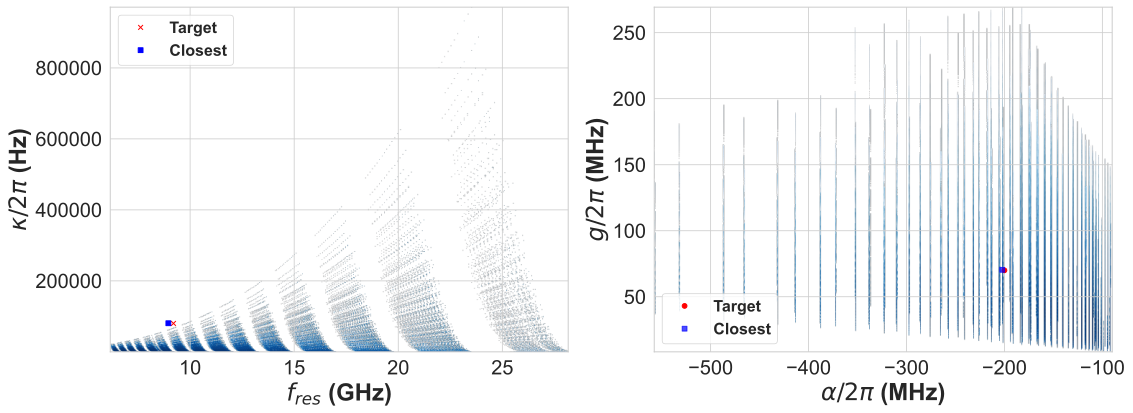

In [61]:
analyzer.closest_design_in_H_space()

#### Interpolation of Best Designs

Even though the `closest_design` will become better as more validated pre-simulated points are added to the database, it is still a good idea to interpolate to get the best designs.

We use the physics inspired interpolation algorithm described in our [paper](https://arxiv.org/pdf/2312.13483.pdf) - `ScalingInterpolator` class to interpolate the best designs.

In [62]:
from squadds.interpolations.physics import ScalingInterpolator

We pass the `Analzyer` object and the `target_params` dict to the `ScalingInterpolator` class.

In [63]:
# Create an instance of ScalingInterpolator
interpolator = ScalingInterpolator(analyzer, target_params)

design_df = interpolator.get_design()

Either `skip_df_gen` flag is set to True or all target params have been precomputed at an earlier step. Using `df` from memory.
Please set this to False if `target_parameters` have changed.
Using 10 CPUs for parallel processing


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 /Users/shanto/LFL/SQuADDS/SQuADDS/squadds/core/analysis.py: 432


Either `skip_df_gen` flag is set to True or all target params have been precomputed at an earlier step. Using `df` from memory.
Please set this to False if `target_parameters` have changed.
Using 10 CPUs for parallel processing


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 /Users/shanto/LFL/SQuADDS/SQuADDS/squadds/core/analysis.py: 432


Kappa scaling: 0.9974902538805511
g scaling: 1.000220775604248
alpha scaling: 1.0098679065704346
resonator scaling: 0.9813371948573901


The `design_df` contains the various `design_options` for the best designs and also the `sim_options` needed to simulate them.

In [64]:
design_df

coupler_type                               design_options_qubit  \
0         NCap  {'aedt_hfss_capacitance': 0, 'aedt_hfss_induct...   

                          design_options_cavity_claw  \
0  {'claw_opts': {'connection_pads': {'readout': ...   

                                         setup_qubit  \
0  {'auto_increase_solution_order': True, 'enable...   

                                   setup_cavity_claw  \
0  {'basis_order': 1, 'max_delta_f': 0.05, 'max_p...   

                                      design_options  
0  {'cavity_claw_options': {'coupler_type': 'NCap...

Let's use this interpolated deisgn to generate a `.gds` file.

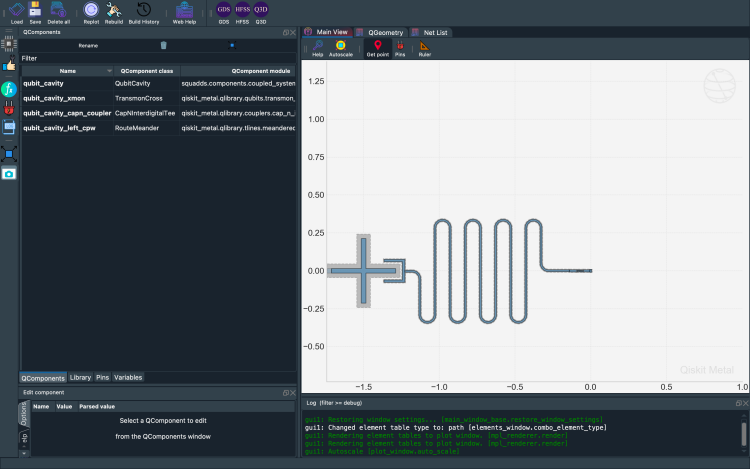

In [65]:
from squadds.components.coupled_systems import QubitCavity
import qiskit_metal as metal
from qiskit_metal import Dict, MetalGUI, designs, draw
from qiskit_metal.toolbox_metal import math_and_overrides

design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

qc_ncap = QubitCavity(design, "qubit_cavity", options=design_df.iloc[0]["design_options"])
gui.rebuild()
gui.autoscale()
gui.screenshot("qubit_half_wave_cavity")

{'pos_x': '0.0um', 'pos_y': '0.0um', 'orientation': -90.0, 'chip': 'main', 'layer': '1', 'prime_width': 0.0117, 'prime_gap': 0.0050999999999999995, 'second_width': 0.0117, 'second_gap': 0.0050999999999999995, 'cap_gap': 0.0040999999999999995, 'cap_width': 0.004900000000000001, 'finger_length': 0.026000000000000002, 'finger_count': 2.0, 'cap_distance': 0.0509, 'hfss_wire_bonds': False, 'q3d_wire_bonds': False, 'aedt_q3d_wire_bonds': False, 'aedt_hfss_wire_bonds': False, 'coupling_length': None, 'cap_gap_ground': 0.0050999999999999995, 'coupling_space': None, 'down_length': None, 'open_termination': None}


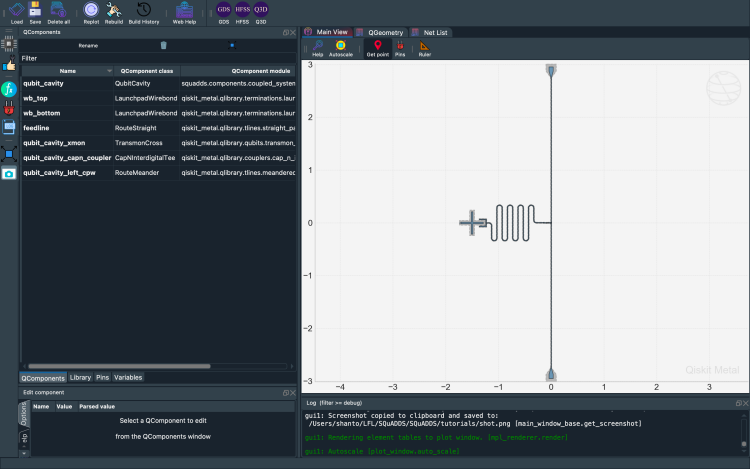

In [67]:
qc_ncap.show(gui, include_wirebond_pads=True)

In [68]:
qc_ncap.to_gds("qubit_cavity", include_wirebond_pads=False)

01:25PM 57s WARNING [_import_junction_gds_file]: Not able to find file:"../resources/Fake_Junctions.GDS".  Not used to replace junction. Checked directory:"/Users/shanto/LFL/SQuADDS/SQuADDS/resources".


Congrats for making it to the end of this tutorial! 🤗🎉 You have now learned how to use the SQuADDS API to query for closest and "best-guess" interpolated device designs for your chosen Hamiltonian parameters.

## Next Steps...

In the next [tutorial](https://lfl-lab.github.io/SQuADDS/source/tutorials/Tutorial-2_Simulate_interpolated_designs.html), we will learn how to simulate the "best-guess" design using an EM solver tool and the `SQuADDS` API.

## License

<div style='width: 100%; background-color:#3cb1c2;color:#324344;padding-left: 10px; padding-bottom: 10px; padding-right: 10px; padding-top: 5px'>
    <h3>This code is a part of SQuADDS</h3>
    <p>Developed by Sadman Ahmed Shanto</p>
    <p>This tutorial is written by Sadman Ahmed Shanto</p> 
    <p>&copy; Copyright Sadman Ahmed Shanto & Eli Levenson-Falk 2023.</p>
    <p>This code is licensed under the MIT License. You may<br> obtain a copy of this license in the LICENSE.txt file in the root directory<br> of this source tree.</p>
    <p>Any modifications or derivative works of this code must retain this<br>copyright notice, and modified files need to carry a notice indicating<br>that they have been altered from the originals.</p>
</div>